Librerías

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

Carga de datos

In [2]:
clientes = pd.read_csv('cliente_tabla.csv')
productos = pd.read_csv('producto_tabla.csv')
sample_submission = pd.read_csv('sample_submission.csv')
test  = pd.read_csv('test.csv')
town_state  = pd.read_csv('town_state.csv')

In [3]:
train = pd.read_csv('train.csv')

#### Explorando la data

In [21]:
print(train.shape)
train.dtypes

(74180464, 11)


Semana                 int64
Agencia_ID             int64
Canal_ID               int64
Ruta_SAK               int64
Cliente_ID             int64
Producto_ID            int64
Venta_uni_hoy          int64
Venta_hoy            float64
Dev_uni_proxima        int64
Dev_proxima          float64
Demanda_uni_equil      int64
dtype: object

In [17]:
train.tail()

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
74180459,9,25759,1,5517,4528866,32873,4,27.76,0,0.00,4
74180460,9,25759,1,5517,4528866,34226,4,37.04,0,0.00,4
74180461,9,25759,1,5517,4528866,45112,4,51.00,0,0.00,4
74180462,9,25759,1,5517,4547943,40217,3,26.94,3,26.94,0
74180463,9,25759,1,5517,4708097,43159,1,10.40,0,0.00,1


In [24]:
#train.duplicated().any()

False

In [191]:
#clientes.duplicated().any()

False

In [60]:
datos_por_producto = train.groupby(['Producto_ID']).sum()
datos_por_semana = train.groupby(['Semana']).sum()
datos_por_canal = train.groupby(['Canal_ID']).mean()

Productos que no están en la tabla producto pero si la de train

Todos los producto están en la bd productos

In [44]:
codigos_producto_df_train = set(datos_por_producto.index)
productos_en_df_productos = set(productos['Producto_ID']) 

productos_no_comunes = codigos_producto_df_train - productos_en_df_productos
productos_no_comunes

set()

In [ ]:
datos_por_producto_con_ventas = datos_por_producto['Venta_uni_hoy']

In [129]:
datos_por_producto[datos_por_producto['Venta_uni_hoy']>0]['Venta_uni_hoy'].sort_values(ascending=False).iloc[:10]

Producto_ID
2425     23860309
1278     19660667
1284     19625219
43285    15259454
36610    12836368
1240     12313013
1250     12158858
2233     11204505
1242     10469789
45143    10062825
Name: Venta_uni_hoy, dtype: int64

In [176]:
datos_por_canal[['Venta_uni_hoy','Venta_hoy','Dev_uni_proxima','Dev_proxima']]

,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima
Canal_ID,,,,
1,5.794558,46.618365,0.091610,0.809501
2,62.420939,1119.820456,1.460698,23.540922
4,12.417794,125.341238,0.072483,0.679674
5,142.468166,1182.018329,9.217717,62.890671
6,12.684618,101.543731,0.193010,1.620715
7,15.320508,178.691976,0.197901,2.367305
8,46.705331,621.013114,3.029819,25.748718
9,88.616402,4057.629206,0.000000,0.000000
11,14.925800,168.864900,0.256623,2.422330


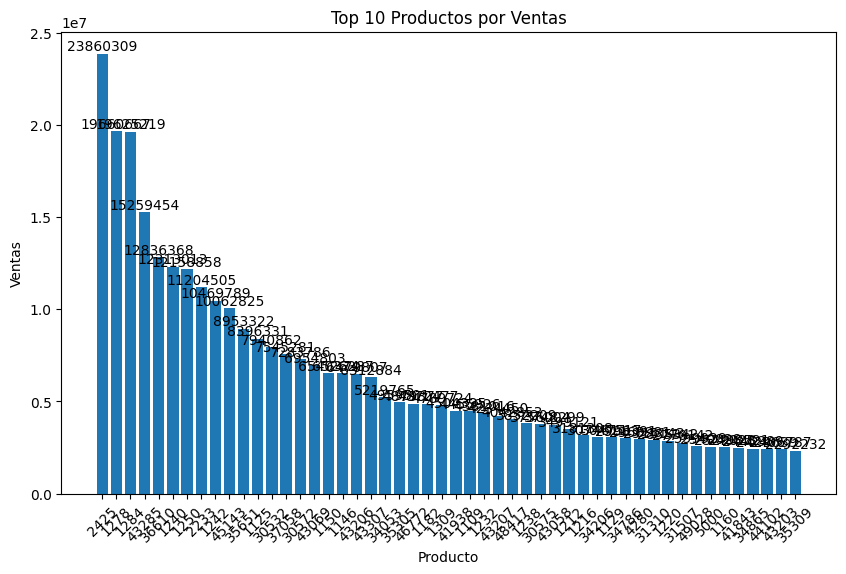

In [153]:
import matplotlib.pyplot as plt

# Seleccionar los datos relevantes (por ejemplo, los 10 productos con las mayores ventas)
top_10_productos = datos_por_producto[datos_por_producto['Venta_uni_hoy'] > 0]['Venta_uni_hoy'].nlargest(50)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(x=top_10_productos.index.astype('str'), height=top_10_productos.values)

# Personalizar el gráfico
plt.title('Top 10 Productos por Ventas')
plt.xlabel('Producto')
plt.ylabel('Ventas')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización

for etq in np.arange(len(top_10_productos)):
    plt.text(x=etq,y=top_10_productos.values[etq],s=top_10_productos.values[etq],
             va='bottom',ha='center')
# Mostrar el gráfico
plt.show()

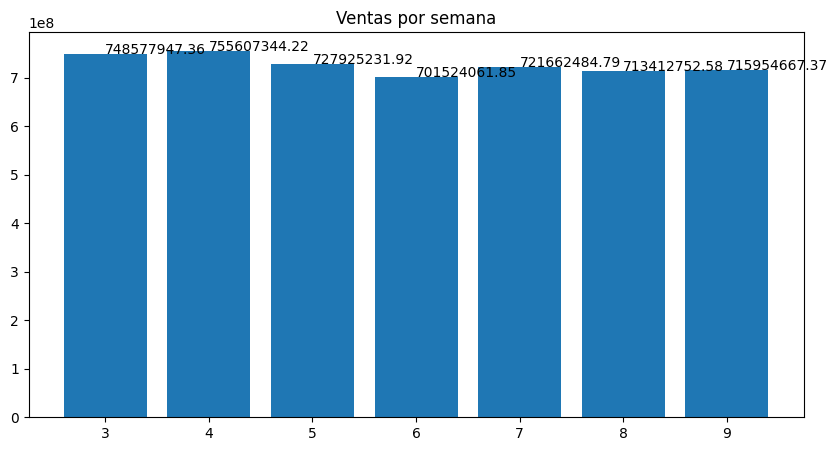

In [78]:
plt.figure(figsize=(10,5))
plt.bar(x=datos_por_semana.index,height=np.array(datos_por_semana['Venta_hoy']))
plt.title('Ventas por semana')
for etq in datos_por_semana['Venta_hoy']:
    plt.text(x=datos_por_semana[datos_por_semana['Venta_hoy']==etq].index[0],y=etq,s=etq)
plt.show()

Matriz de correlación

In [81]:
Ventas_por_semana = pd.pivot_table(data=train,index='Producto_ID',columns='Semana')

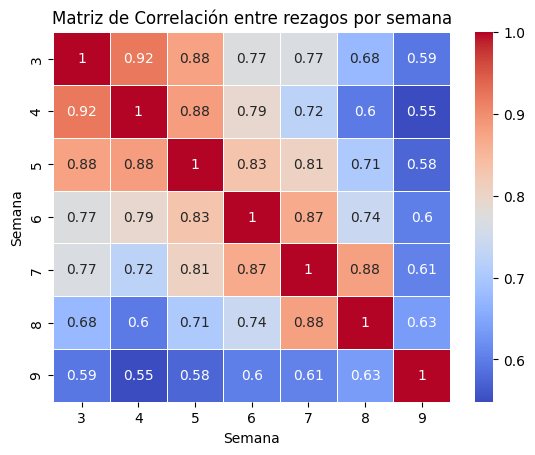

In [114]:
correlaciones = Ventas_por_semana['Agencia_ID'].reset_index().drop(columns='Producto_ID').corr()
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre rezagos por semana')
plt.show()

Comportamiento de un producto

In [183]:
def mostrar_comportamiento_de_un_producto(df,producto,agencia,cliente):
    df_filtrado = df[(df['Producto_ID']==producto) &
                      (df['Agencia_ID']==agencia) &
                      (df['Cliente_ID']==cliente)] 

    return df_filtrado

#24225
mostrar_comportamiento_de_un_producto(df=train,producto=1212,agencia=1110,cliente=15766)

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
11165209,4,1110,7,3301,15766,1212,4,33.52,0,0.0,4
22174800,5,1110,7,3301,15766,1212,5,41.90,0,0.0,5
53364883,8,1110,7,3301,15766,1212,4,33.52,0,0.0,4
63771751,9,1110,7,3301,15766,1212,1,8.38,0,0.0,1


#### Pre procesando la data

Limpiar data de clientes

In [233]:
#Número de clientes duplicados
print(clientes.groupby('Cliente_ID').count().sort_values(by='NombreCliente',ascending=False)[clientes.groupby('Cliente_ID').count().sort_values(by='NombreCliente',ascending=False)['NombreCliente']==2].shape)
clientes_Sin_duplicados = clientes.drop_duplicates(subset=['Cliente_ID'],keep='first')
print(clientes_Sin_duplicados.groupby('Cliente_ID').count().sort_values(by='NombreCliente',ascending=False)[clientes_Sin_duplicados.groupby('Cliente_ID').count().sort_values(by='NombreCliente',ascending=False)['NombreCliente']==2].shape)

(4862, 1)
(0, 1)


Ingenería de Variables

In [438]:
def calcular_variables(df):
    df['Precio_Promedio'] = df['Venta_hoy']/df['Venta_uni_hoy'] # Precio promedio
    df['Ratio Devoluciones_unit'] =df['Venta_uni_hoy']/df['Dev_uni_proxima'] #Ratio de devoluciones
    df['Ratio_Devoluciones_valor'] = df['Venta_hoy']/df['Dev_proxima'] #Ratio en pesos de devoluciones
    df[np.isinf(df)] = np.nan
    df= df.fillna(0)
    return df

Categorización de productos por comportamiento de ventas

In [245]:
train_producto_grouped = train.groupby(['Producto_ID','Semana'])[['Venta_uni_hoy','Venta_hoy','Dev_uni_proxima','Dev_proxima']].sum()
train_producto_grouped = train_producto_grouped.groupby('Producto_ID').mean()
train_producto_grouped = calcular_variables(train_producto_grouped)

Custering y estandarización

(1799, 2)

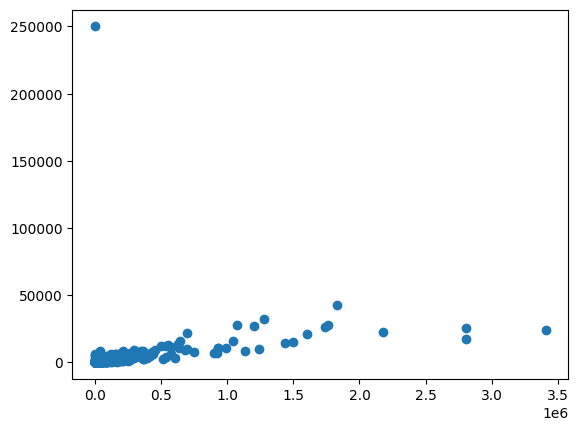

In [370]:
train_producto_grouped = train_producto_grouped[['Venta_uni_hoy','Dev_uni_proxima']].copy()
train_producto_grouped[np.isinf(train_producto_grouped)] = np.nan
train_producto_grouped= train_producto_grouped.fillna(0)
plt.scatter(x=train_producto_grouped['Venta_uni_hoy'],y=train_producto_grouped['Dev_uni_proxima'])
train_producto_grouped.shape

Detección de outliers

In [381]:
Q1 = train_producto_grouped.quantile(0.25)
Q3 = train_producto_grouped.quantile(0.75)
IQR = Q3 - Q1

l_inf = Q1 - 1.5 * IQR
l_sup = Q3 + 1.5 * IQR


outliers = train_producto_grouped[(train_producto_grouped < l_inf) | (train_producto_grouped > l_sup)]

filas_con_nulos = outliers[outliers.isnull().any(axis=1)].index
filas_sin_nulos = outliers[outliers.notnull().all(axis=1)].index
train_producto_grouped_sin_outliers = train_producto_grouped.loc[filas_sin_nulos] 
train_producto_grouped_solo_outliers = train_producto_grouped.loc[filas_con_nulos] 

train_producto_grouped_sin_outliers.sort_values(by='Venta_uni_hoy')

Venta_uni_hoy      36072.797619
Dev_uni_proxima      807.707143
dtype: float64


,Venta_uni_hoy,Dev_uni_proxima
Producto_ID,,
31089,3.642286e+04,1308.857143
3919,3.686386e+04,2101.285714
32322,3.697686e+04,1241.285714
43230,3.756271e+04,2000.714286
34208,3.805129e+04,1793.142857
...,...,...
36610,1.833767e+06,42535.000000
43285,2.179922e+06,22630.714286
1284,2.803603e+06,17467.571429


Asignación de grupo para no outliers

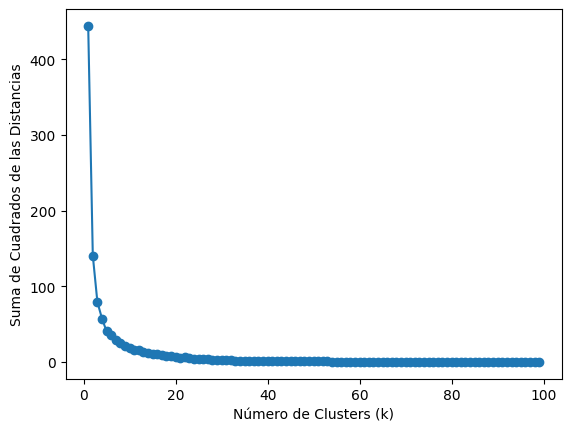

8
El numero de clusters es [0 1 2 3 4 5 6 7]


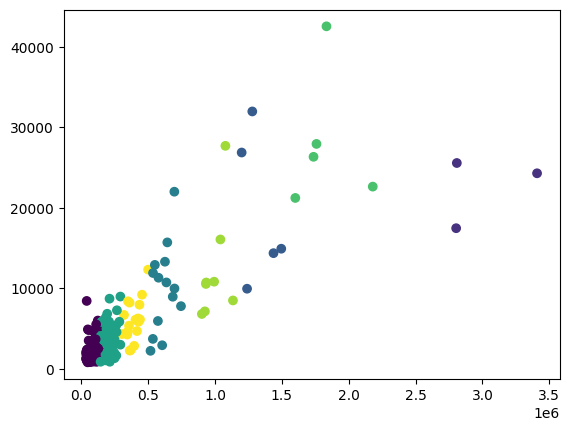

In [429]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn_extra.cluster import KMedoids

scaler_sin_out = StandardScaler()
train_scaled = scaler_sin_out.fit_transform(train_producto_grouped_sin_outliers)


inercia_by_cluster = []
for k in range(1, 100):
    kmeans = KMeans(n_clusters=k,n_init='auto')
    kmeans.fit(train_scaled)
    inercia_by_cluster.append(kmeans.inertia_)

plt.plot(range(1, 100), inercia_by_cluster, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de Cuadrados de las Distancias')
plt.show()

num_clusters = range(1, len(inercia_by_cluster) + 1)

knee = KneeLocator(num_clusters, inercia_by_cluster, S=1, curve='convex', direction='decreasing')
print(num_clusters[knee.knee])

kmeans = KMeans(n_clusters=num_clusters[knee.knee],n_init='auto')
kmeans.fit(train_producto_grouped_sin_outliers)

labels = kmeans.labels_

train_producto_grouped_sin_outliers_cluster = train_producto_grouped_sin_outliers.copy()
train_producto_grouped_sin_outliers_cluster['Cluster'] = labels
print('El numero de clusters es '+str(np.unique(labels)))
plt.scatter(x=train_producto_grouped_sin_outliers_cluster['Venta_uni_hoy'],y=train_producto_grouped_sin_outliers_cluster['Dev_uni_proxima'],c=train_producto_grouped_sin_outliers_cluster['Cluster'])

Asignación de grupo para outliers

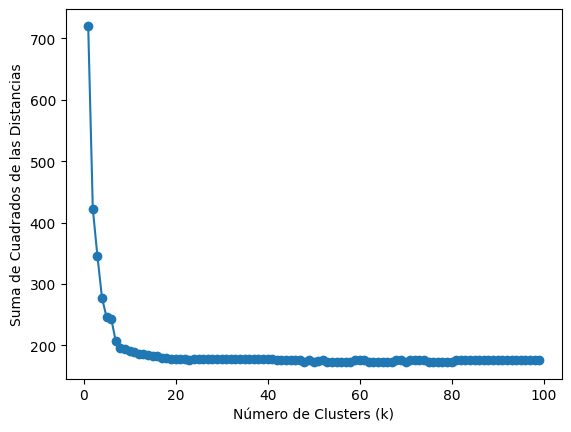

9
El numero de clusters es [0 1 2 3 4 5 6 7 8]


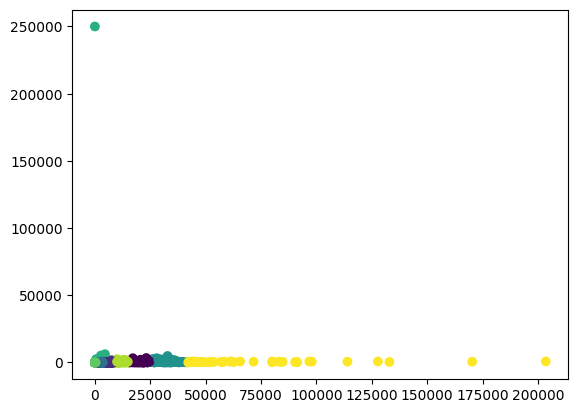

In [412]:
scaler_solo_outliers = StandardScaler()
train_scaled = scaler_solo_outliers.fit_transform(train_producto_grouped_solo_outliers)

inercia_by_cluster = []
for k in range(1, 100):
    kmeans = KMedoids(n_clusters=k)
    kmeans.fit(train_scaled)
    inercia_by_cluster.append(kmeans.inertia_)

plt.plot(range(1, 100), inercia_by_cluster, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de Cuadrados de las Distancias')
plt.show()

num_clusters = range(1, len(inercia_by_cluster) + 1)

knee = KneeLocator(num_clusters, inercia_by_cluster, S=1, curve='convex', direction='decreasing')
print(num_clusters[knee.knee])

kmeans = KMedoids(n_clusters=num_clusters[knee.knee])
kmeans.fit(train_scaled)

labels = kmeans.labels_

train_producto_grouped_solo_outliers_cluster = train_producto_grouped_solo_outliers.copy()
train_producto_grouped_solo_outliers_cluster['Cluster'] = labels
print('El numero de clusters es '+str(np.unique(labels)))
plt.scatter(x=train_producto_grouped_solo_outliers_cluster['Venta_uni_hoy'],y=train_producto_grouped_solo_outliers_cluster['Dev_uni_proxima'],c=train_producto_grouped_solo_outliers_cluster['Cluster'])

In [436]:
# Unión de outliers y no outliers
train_producto_grouped_solo_outliers_cluster_worked = train_producto_grouped_solo_outliers_cluster.copy()
train_producto_grouped_solo_outliers_cluster_worked['Cluster'].unique()
train_producto_grouped_solo_outliers_cluster_worked['Cluster'] = train_producto_grouped_solo_outliers_cluster_worked['Cluster']+1+train_producto_grouped_sin_outliers_cluster['Cluster'].max()
train_producto_grouped_solo_outliers_cluster_worked['Cluster'].unique()

Clusteres_definidos = pd.concat([train_producto_grouped_solo_outliers_cluster_worked,train_producto_grouped_sin_outliers_cluster])[['Cluster']]
print(Clusteres_definidos['Cluster'].unique())
Clusteres_definidos.head()

[11  9 14 10  8 12 16 15 13  0  4  3  2  7  6  5  1]


,Cluster
Producto_ID,
41,11
53,9
100,14
106,11
107,14


Separación de dataframes

In [443]:
train_ajustado = calcular_variables(train)

MemoryError: Unable to allocate 566. MiB for an array with shape (74180464,) and data type float64